# 4. H5: El grupo experimental va a hacer más meta-reflexión sobre su estudio


* **author** = Diego Sapunar-Opazo
* **copyright** = Copyright 2019, Thesis M.Sc. Diego Sapunar - Pontificia Universidad Católica de Chile
* **credits** = Diego Sapunar-Opazo, Ronald Perez, Mar Perez-Sanagustin, Jorge Maldonado-Mahauad
* **maintainer** = Diego Sapunar-Opazo
* **email** = dasapunar@uc.cl
* **status** = Dev

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats
from scipy.stats import ttest_ind

## Part 1: Getting the Data

In [2]:
df_sec = pd.read_csv('../../data/clean_data/students_sec.csv')
df_clusters = pd.read_csv('../../data/final_data/students_clusters.csv')
df_perception = pd.read_csv('../../data/final_data/perception_report.csv')
df_grades = pd.read_csv('../../data/final_data/performance_weekly.csv')

## Part 2: Analyzing

In [3]:
df = pd.merge(left=df_sec, left_on='num_alumno', right=df_perception, right_on='num_alumno')
df = pd.merge(left=df, left_on='num_alumno', right=df_clusters, right_on='num_alumno')

### (2.1) ¿Qué tan beneficiosas fueron las clases presenciales de la semana pasada?

In [4]:
df.head(3)

,num_alumno,sec,week,perception_lecture_score,perception_comprehension_score,cluster
0,14633000,1,8,3,2,2
1,14633000,1,6,3,2,2
2,14633000,1,5,3,3,2


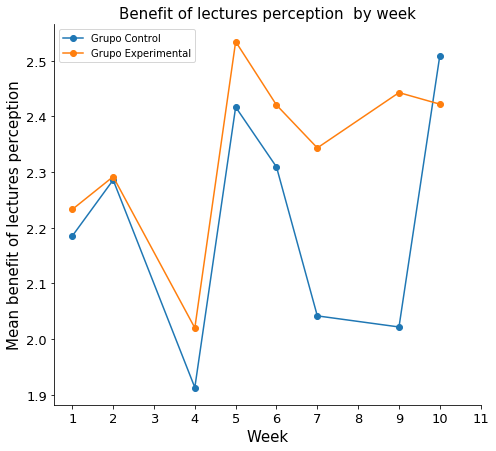

In [155]:
DELETE_EXAMS = True

if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)][['week', 'sec', 'perception_lecture_score']].groupby(['week', 'sec']).mean()
    aux_count = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)][['week', 'sec', 'perception_lecture_score']].groupby(['week', 'sec']).count()

else:
    aux_mean = df[['week', 'sec', 'perception_lecture_score']].groupby(['week', 'sec']).mean()
    aux_count = df[['week', 'sec', 'perception_lecture_score']].groupby(['week', 'sec']).count()

# Creating Grid
# gs = gridspec.GridSpec(4, 4)
fig = plt.figure(figsize=(26,7))
ax1 = fig.add_subplot(1,3,1)

# Plotting
aux_mean['perception_lecture_score'].unstack(level=1).plot(ax=ax1, legend='best', marker='o')

if DELETE_EXAMS: pass
else:
    for i in range(1, 12):
        ax1.annotate(s='n=' + str(aux_count['perception_lecture_score'].unstack(level=1).iloc[i-1][1]), xy=(i + 0.2, round(aux_mean['perception_lecture_score'].unstack(level=1).iloc[i-1][1], 2)), size=12, color = 'b') 
        ax1.annotate(s='n=' + str(aux_count['perception_lecture_score'].unstack(level=1).iloc[i-1][2]), xy=(i + 0.2, round(aux_mean['perception_lecture_score'].unstack(level=1).iloc[i-1][2], 2)), size=12, color='orange') 

# Setting Titles
ax1.set_title('Benefit of lectures perception by week', fontsize=15)

# Axis Labels
ax1.set_ylabel('Mean benefit of lectures perception', fontsize=15)
ax1.set_xlabel('Week', fontsize=15)


# Tick Styles
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])

# Set cool Legend format
ax1.legend(loc='best', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
ax1.legend(labels=['Grupo Control','Grupo Experimental'])

# selecting spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)


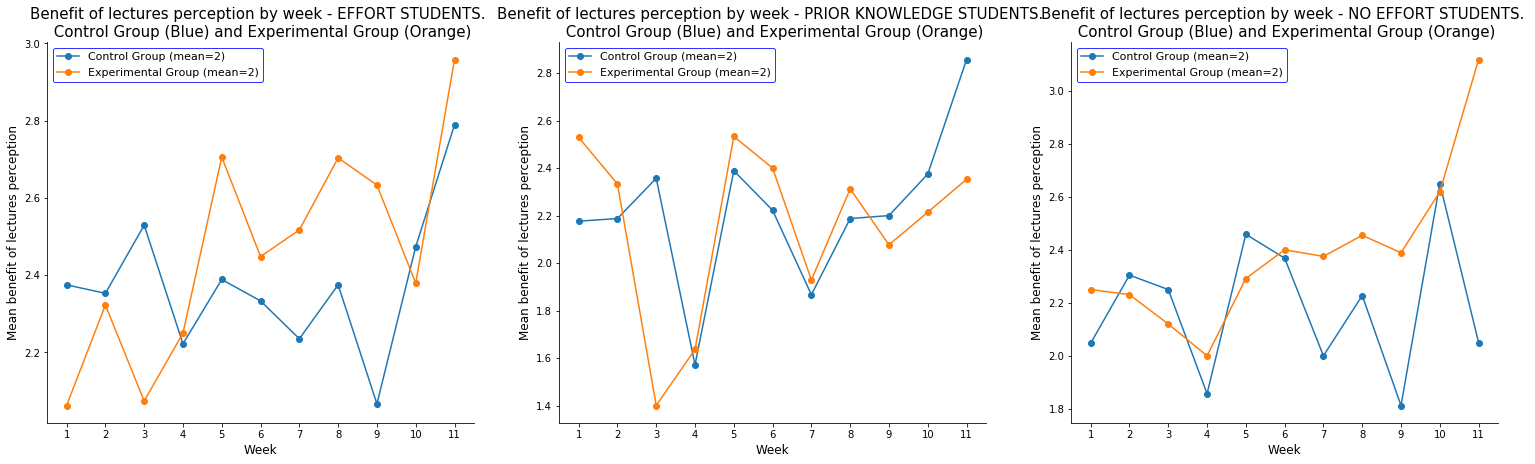

In [157]:
DELETE_EXAMS = False

if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)][['week', 'cluster', 'sec', 'perception_lecture_score']].groupby(['week', 'sec']).mean()

else:
    aux_mean = df[['week', 'sec', 'cluster', 'perception_lecture_score']].groupby(['week', 'cluster', 'sec']).mean()

# aux_mean = df.groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()

fig, axs = plt.subplots(1,3, figsize=(26, 7))

# plotting
aux_mean['perception_lecture_score'].unstack(level=[1,2])[0].plot(ax=axs[0], legend='best', marker='o')
aux_mean['perception_lecture_score'].unstack(level=[1,2])[1].plot(ax=axs[1], legend='best', marker='o')
aux_mean['perception_lecture_score'].unstack(level=[1,2])[2].plot(ax=axs[2], legend='best', marker='o')

# setting titles
axs[0].set_title('Benefit of lectures perception by week - EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[1].set_title('Benefit of lectures perception by week - PRIOR KNOWLEDGE STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[2].set_title('Benefit of lectures perception by week - NO EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

for ax in range(3):
    # axis Labels
    axs[ax].set_ylabel('Mean benefit of lectures perception', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
# set cool Legend format
axs[0].legend(labels=['Control Group (mean=' + str(int(aux_mean['perception_lecture_score'].unstack(level=[1,2])[0][1].mean())) +')',
                      'Experimental Group (mean=' + str(int(aux_mean['perception_lecture_score'].unstack(level=[1,2])[0][2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[1].legend(labels=['Control Group (mean=' + str(int(aux_mean['perception_lecture_score'].unstack(level=[1,2])[1][1].mean())) +')',
                      'Experimental Group (mean=' + str(int(aux_mean['perception_lecture_score'].unstack(level=[1,2])[1][2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')
axs[2].legend(labels=['Control Group (mean=' + str(int(aux_mean['perception_lecture_score'].unstack(level=[1,2])[2][1].mean())) +')',
                      'Experimental Group (mean=' + str(int(aux_mean['perception_lecture_score'].unstack(level=[1,2])[2][2].mean())) +')'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')

# selecting spines
for ax in range(3):
    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)
    


#### Versus Grades

In [15]:
df = pd.merge(left=df, right=df_grades, left_on=['num_alumno', 'week'], right_on=['num_alumno', 'week'])

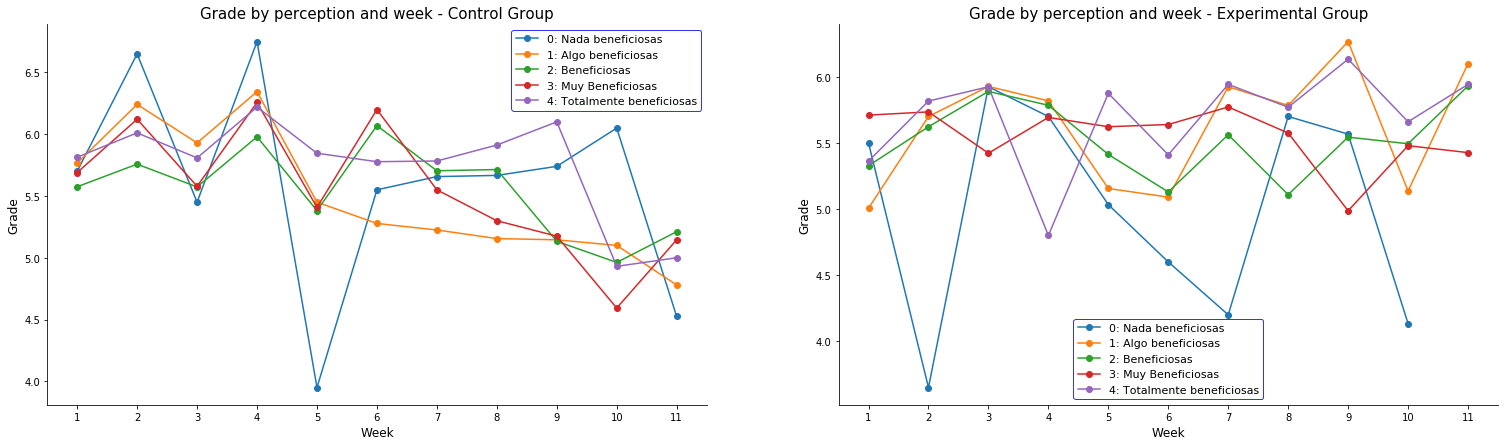

In [50]:
aux_mean_1 = df[df['sec'] == 1].groupby(['week','perception_lecture_score']).mean()
aux_mean_2 = df[df['sec'] == 2].groupby(['week','perception_lecture_score']).mean()

fig, axs = plt.subplots(1,2, figsize=(26, 7))

# plotting
aux_mean_1['FC'].unstack(level=1).plot(ax=axs[0], legend='best', marker='o')
aux_mean_2['FC'].unstack(level=1).plot(ax=axs[1], legend='best', marker='o')

# setting titles
axs[0].set_title('Grade by perception and week - Control Group', 
              fontsize=15)

axs[1].set_title('Grade by perception and week - Experimental Group', 
              fontsize=15)

for ax in range(2):
    # axis Labels
    axs[ax].set_ylabel('Grade', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
    axs[ax].legend(labels=['0: Nada beneficiosas',
                          '1: Algo beneficiosas',
                          '2: Beneficiosas',
                          '3: Muy Beneficiosas',
                          '4: Totalmente beneficiosas'], 
               loc='best', 
               fontsize=11, 
               frameon=True).get_frame().set_edgecolor('blue')

    # selecting spines
    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)
    


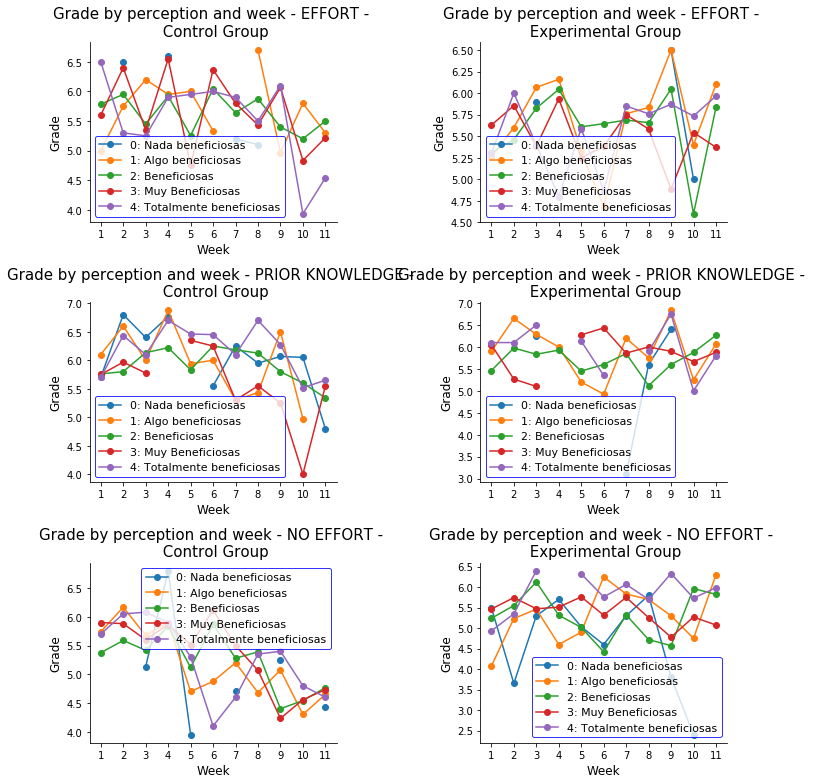

In [74]:
aux_mean_1_0 = df[(df['sec'] == 1) & (df['cluster'] == 0)].groupby(['week','perception_lecture_score']).mean()
aux_mean_1_1 = df[(df['sec'] == 1) & (df['cluster'] == 1)].groupby(['week','perception_lecture_score']).mean()
aux_mean_1_2 = df[(df['sec'] == 1) & (df['cluster'] == 2)].groupby(['week','perception_lecture_score']).mean()

aux_mean_2_0 = df[(df['sec'] == 2) & (df['cluster'] == 0)].groupby(['week','perception_lecture_score']).mean()
aux_mean_2_1 = df[(df['sec'] == 2) & (df['cluster'] == 1)].groupby(['week','perception_lecture_score']).mean()
aux_mean_2_2 = df[(df['sec'] == 2) & (df['cluster'] == 2)].groupby(['week','perception_lecture_score']).mean()

fig, axs = plt.subplots(3,2, figsize=(11, 11))

# plotting
aux_mean_1_0['FC'].unstack(level=1).plot(ax=axs[0,0], legend='best', marker='o')
aux_mean_1_1['FC'].unstack(level=1).plot(ax=axs[1,0], legend='best', marker='o')
aux_mean_1_2['FC'].unstack(level=1).plot(ax=axs[2,0], legend='best', marker='o')
aux_mean_2_0['FC'].unstack(level=1).plot(ax=axs[0,1], legend='best', marker='o')
aux_mean_2_1['FC'].unstack(level=1).plot(ax=axs[1,1], legend='best', marker='o')
aux_mean_2_2['FC'].unstack(level=1).plot(ax=axs[2,1], legend='best', marker='o')


# setting titles
axs[0,0].set_title('Grade by perception and week - EFFORT - \n Control Group', 
              fontsize=15)
axs[1,0].set_title('Grade by perception and week - PRIOR KNOWLEDGE - \n Control Group', 
              fontsize=15)

axs[2,0].set_title('Grade by perception and week - NO EFFORT - \n Control Group', 
              fontsize=15)
axs[0,1].set_title('Grade by perception and week - EFFORT - \n Experimental Group', 
              fontsize=15)
axs[1,1].set_title('Grade by perception and week - PRIOR KNOWLEDGE - \n Experimental Group', 
              fontsize=15)

axs[2,1].set_title('Grade by perception and week - NO EFFORT - \n Experimental Group', 
              fontsize=15)

for sec in range(2):
    for ax in range(3):
        # axis Labels
        axs[ax, sec].set_ylabel('Grade', fontsize=12)
        axs[ax, sec].set_xlabel('Week', fontsize=12)

        # tick Styles
        axs[ax, sec].tick_params(axis='both', which='major', labelsize=10)
        axs[ax, sec].set_xticks([1,2,3,4,5,6,7,8,9,10,11])

        axs[ax, sec].legend(labels=['0: Nada beneficiosas',
                              '1: Algo beneficiosas',
                              '2: Beneficiosas',
                              '3: Muy Beneficiosas',
                              '4: Totalmente beneficiosas'], 
                   loc='best', 
                   fontsize=11, 
                   frameon=True).get_frame().set_edgecolor('blue')

        # selecting spines
        axs[ax, sec].spines['top'].set_visible(False)
        axs[ax, sec].spines['right'].set_visible(False)
        axs[ax, sec].spines['bottom'].set_visible(True)
        axs[ax, sec].spines['left'].set_visible(True)
plt.tight_layout()


In [5]:
for sec in range(2):
    print(sec)

0
1


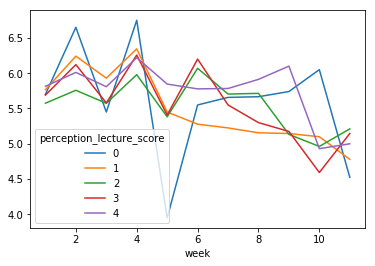

In [41]:
aux = df[df['sec'] == 1].groupby(['week','perception_lecture_score']).mean()
aux['FC'].unstack(level=1).plot()

In [11]:
week = 1
df['perception_lecture_score'] = df['perception_lecture_score']
df[df['week'] == week]['perception_lecture_score']

5       2
15      1
35      1
46      4
60      3
71      2
82      4
93      1
106     3
127     2
129     1
137     2
148     1
159     4
169     4
183     1
190     2
199     3
202     4
228     2
230     2
237     2
248     3
258     0
291     3
301     1
306     2
315     2
326     4
339     2
       ..
1029    4
1040    3
1041    2
1052    3
1059    1
1070    4
1078    4
1085    1
1091    2
1094    2
1097    2
1106    1
1114    3
1121    2
1132    2
1141    1
1151    2
1164    2
1175    2
1185    3
1190    2
1201    2
1211    1
1222    2
1238    1
1259    2
1269    2
1278    3
1291    3
1300    3
Name: perception_lecture_score, Length: 127, dtype: int64

In [40]:
aux

sec  perception_comprehension_score   cluster  \
week perception_lecture_score                                                  
1    0                         1.0                        1.000000  1.000000   
     1                         1.0                        1.416667  1.250000   
     2                         1.0                        1.750000  1.208333   
     3                         1.0                        2.200000  0.600000   
     4                         1.0                        3.000000  1.142857   
2    0                         1.0                        2.000000  0.500000   
     1                         1.0                        1.583333  1.333333   
     2                         1.0                        2.052632  1.105263   
     3                         1.0                        2.357143  0.928571   
     4                         1.0                        2.888889  1.222222   
3    0                         1.0                        1.250000  1.750000   
     1                         1.0                        1.700000  1.100000   
     2                         1.0                        2.133333  1.000000   
     3                         1.0                        2.285714  1.142857   
     4                         1.0                        2.666667  1.083333   
4    0                         1.0                        1.500000  1.166667   
     1                         1.0                        1.888889  1.111111   
     2                         1.0                        1.947368  0.789474   
     3                         1.0                        2.285714  0.857143   
     4                         1.0                        2.800000  0.800000   
5    0                         1.0                        1.500000  2.000000   
     1                         1.0                        1.700000  1.300000   
     2                         1.0                        2.045455  0.727273   
     3                         1.0                        2.538462  1.230769   
     4                         1.0                        2.923077  1.307692   
6    0                         1.0                        2.000000  1.000000   
     1                         1.0                        1.222222  1.111111   
     2                         1.0                        2.304348  0.869565   
     3                         1.0                        2.166667  1.333333   
     4                         1.0                        2.888889  0.888889   
7    0                         1.0                        0.714286  1.142857   
     1                         1.0                        1.000000  1.750000   
     2                         1.0                        1.956522  0.695652   
     3                         1.0                        1.750000  1.375000   
     4                         1.0                        3.000000  0.833333   
8    0                         1.0                        0.666667  0.666667   
     1                         1.0                        1.222222  1.444444   
     2                         1.0                        1.857143  1.047619   
     3                         1.0                        2.384615  1.230769   
     4                         1.0                        3.000000  0.875000   
9    0                         1.0                        1.600000  1.400000   
     1                         1.0                        1.818182  0.818182   
     2                         1.0                        2.000000  1.133333   
     3                         1.0                        2.125000  1.000000   
     4                         1.0                        3.000000  0.857143   
10   0                         1.0                        3.000000  1.000000   
     1                         1.0                        1.777778  0.888889   
     2                         1.0                        2.437500  1.000000   
     3                         

## Part 3: Hypothesis Testing

In [133]:
def t_test(data1, data2, variables=[]):
    data = {'item': [], 'mean1': [], 'std1': [], 'mean2': [], 'std2': [], 't': [], 'p': []}
    for var in variables:
        data['item'].append(var)
#         print('VARIABLE: ', var)
        
        data1_mean = data1[var].dropna().mean()
        data2_mean = data2[var].dropna().mean()
        data['mean1'].append(data1_mean)
        data['mean2'].append(data2_mean)
#         print("data1 mean value:", data1_mean)
#         print("data2 mean value:", data2_mean)
#         print("data1 m:", len(data1[var]))

        
        data1_std = data1[var].std()
        data2_std = data2[var].std()
        data['std1'].append(data1_std)
        data['std2'].append(data2_std)
#         print("data1 std value:",data1_std)
#         print("data2 std value:",data2_std)
        ttest,pval = ttest_ind(data1[var].dropna(),data2[var].dropna())
        data['t'].append(ttest)
        data['p'].append(pval)
#         print("t-value",ttest)
#         print("p-value",pval)
#         print()
        
    return pd.DataFrame(data)
        

In [134]:
variables = [1,2,3,4,5,6,7,8,9,10,11]

In [160]:
aux = df[['num_alumno', 'week', 'sec', 'perception_lecture_score']].groupby(['num_alumno', 'week']).mean()
aux = aux['perception_lecture_score'].unstack(level=1).reset_index()
aux = pd.merge(left=aux, left_on='num_alumno', right=df_sec, right_on='num_alumno')
aux = pd.merge(left=aux, left_on='num_alumno', right=df_clusters, right_on='num_alumno')


In [161]:
data1, data2 = aux[aux['sec'] == 1],aux[aux['sec'] == 2]
test = t_test(data1, data2, variables)
test.to_csv('../../results/H5/h5_lectures_sections.csv', index=False)
test

,item,mean1,std1,mean2,std2,t,p
0,1,2.185185,0.991931,2.232877,0.964949,-0.272104,0.785991
1,2,2.285714,1.090693,2.291667,0.910618,-0.033635,0.973222
2,3,2.363636,1.222681,1.940299,1.042732,2.063945,0.041179
3,4,1.913043,1.151349,2.020000,0.958102,-0.496212,0.620903
4,5,2.416667,1.109156,2.534247,1.093950,-0.612952,0.540971
5,6,2.309091,1.051854,2.420290,1.005950,-0.599277,0.550099
6,7,2.041667,1.166160,2.343284,0.993193,-1.492704,0.138302
7,8,2.259259,1.084804,2.523077,0.969982,-1.399771,0.164228
8,9,2.021739,1.220002,2.442623,1.072763,-1.893632,0.061026
9,10,2.509091,1.136478,2.421875,1.095513,0.425571,0.671202


In [168]:
c=2
data1, data2 = aux[(aux['sec'] == 1) & (aux['cluster'] == c)],aux[(aux['sec'] == 2) & (aux['cluster'] == c)]
test = t_test(data1, data2, variables)
test.to_csv('../../results/H5/h5_lectures_cluster' + str(c) + '.csv', index=False)
test




,item,mean1,std1,mean2,std2,t,p
0,1,2.047619,0.864650,2.250000,1.032094,-0.707093,0.483324
1,2,2.304348,1.063219,2.230769,1.031802,0.245591,0.807068
2,3,2.250000,1.326978,2.120000,1.053565,0.380609,0.705208
3,4,1.857143,1.167321,2.000000,1.105542,-0.358338,0.722519
4,5,2.458333,1.284664,2.291667,1.267629,0.452407,0.653102
5,6,2.368421,0.955134,2.400000,1.154701,-0.096633,0.923477
6,7,2.000000,1.154701,2.375000,1.013496,-1.084404,0.285018
7,8,2.227273,0.922307,2.454545,0.962500,-0.799665,0.428405
8,9,1.812500,1.108678,2.388889,1.092159,-1.525128,0.137051
9,10,2.650000,0.933302,2.619048,1.244033,0.089764,0.928934
